In [0]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [0]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [0]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [0]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

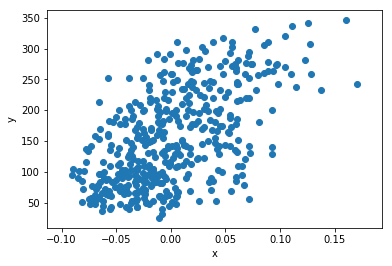

In [0]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
x = diabetes.data[:, 2]
y = diabetes.target

## 경사하강법

In [0]:
w = 1.0
b = 1.0

In [0]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [0]:
print(y[0])

151.0


In [0]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [0]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [0]:
w_new  = w + w_rate
print(w_new)

1.0616962065186888


In [0]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


In [0]:
b_new = b + 1
print(b_new)

2.0


## 오차역전파(backpropagation)

In [0]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [0]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [0]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


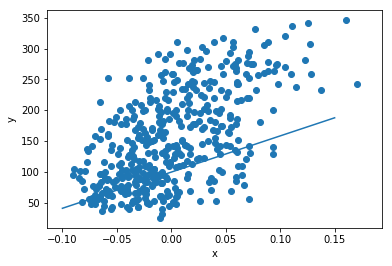

In [0]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


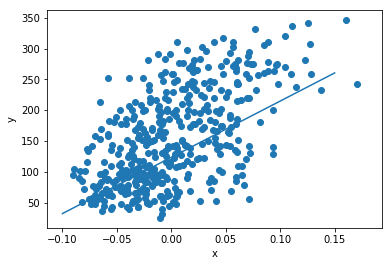

In [0]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


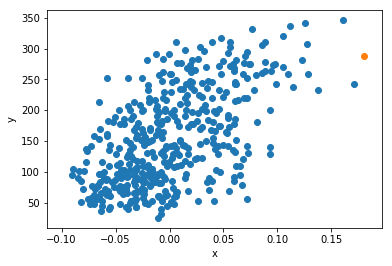

In [0]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 손실함수와 경사 하강법의 관계

![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2F9EKmt%2FbtqyM3cjmRM%2FYIivlYnkJWFhbjkv3lmxA1%2Fimg.png)

In [0]:
y_hat = x_i * w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err

![대체 텍스트](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FGECOQ%2FbtqyOoAcZvq%2FjoVpnEDa7gZvLYrmHkZvD1%2Fimg.png)

In [0]:
err = y_i + y_hat
b = b + 1 * err

## 선형 회귀를 위한 뉴런 만들기

In [0]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
    
    # 정방향 계산 만들기
    
    def forpass(self, x):
        y_hat = x * self.w + self.b # 직선 방정식을 계산
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그레이디언트를 계산
        b_grad = 1 * err # 절편에 대한 그레디언트 계산
        return w_grad, b_grad
        
    # 훈련을 위한 fit()메서드 구현
    def fit(self, x, y, epochs = 100):
        for i in range(epochs): 
            for x_i, y_i in zip(x, y): # 모든 샘플에 대해 반복
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat) # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트


In [0]:
neuron = Neuron()
neuron.fit(x, y)

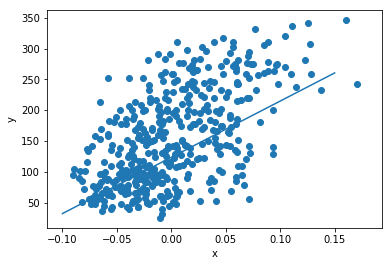

In [29]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()